<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Experiment (XVII): Reproducing Schechter Luminosity Function of Galxies__

## Deriving the Schechter Luminosity Function in Magnitude Form

The Schechter luminosity function in terms of luminosity is given by:

$$
\phi(L) dL = \phi^* \left( \frac{L}{L^*} \right)^\alpha e^{-L/L^*} \frac{dL}{L^*}
$$

We want to express this in terms of absolute magnitude $ M $, rather than luminosity $ L $.

---

### Step 1: Relate Magnitude and Luminosity

The relation between absolute magnitude $ M $ and luminosity $ L $ is:

$$
M = -2.5 \log_{10} L + C
$$

Solving for $ L $:

$$
L = 10^{(C - M)/2.5}
$$

---

### Step 2: Compute $ \frac{dL}{dM} $

$$
\frac{dL}{dM} = \frac{d}{dM} \left( 10^{(C - M)/2.5} \right)
= -\frac{\ln 10}{2.5} \cdot 10^{(C - M)/2.5}
= -\frac{\ln 10}{2.5} L
$$

---

### Step 3: Change Variables in the Luminosity Function

We now convert $ \phi(L) dL $ to $ \phi(M) dM $ using:

$$
\phi(M) dM = \phi(L) \left| \frac{dL}{dM} \right| dM
$$

So:

$$
\phi(M) = \phi^* \left( \frac{L}{L^*} \right)^\alpha e^{-L/L^*} \cdot \frac{1}{L^*} \cdot \left| \frac{dL}{dM} \right|
$$

Substitute $ \left| \frac{dL}{dM} \right| = \frac{\ln 10}{2.5} L $:

$$
\phi(M) = \phi^* \left( \frac{L}{L^*} \right)^\alpha e^{-L/L^*} \cdot \frac{1}{L^*} \cdot \frac{\ln 10}{2.5} L
$$

$$
\phi(M) = 0.4 \ln 10 \cdot \phi^* \cdot 10^{0.4(\alpha + 1)(M^* - M)} \cdot e^{-10^{0.4(M^* - M)}}
$$

This is the Schechter function in magnitude form.

---

### Step 4: Faint-End Slope

Take the logarithm of $ \phi(M) $:

$$
\log_{10} \phi(M) = \log_{10}(0.4 \ln 10 \cdot \phi^*) + 0.4(\alpha + 1)(M^* - M) - \frac{10^{0.4(M^* - M)}}{\ln 10}
$$

At the faint end, $ M \gg M^* $, so $ 10^{0.4(M^* - M)} \ll 1 $ and the exponential term goes to 1. Then:

$$
\log_{10} \phi(M) \approx \text{const} + 0.4(\alpha + 1)(M^* - M)
$$

Taking the derivative:

$$
\frac{d \log_{10} \phi(M)}{dM} = -0.4(\alpha + 1)
$$

So for a flat faint-end slope, we require:

$$
\frac{d \log_{10} \phi(M)}{dM} = 0 \Rightarrow \alpha = -1
$$

This confirms that $ \alpha = -1 $ corresponds to a flat slope in a log-log plot at the faint end.


In [3]:
# Importing Main Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Constants
c = 3e5  # speed of light in km/s
H0 = 70  # Hubble constant in km/s/Mpc
m_r_limit = 17.5  # apparent magnitude limit

# Loading data 
df = pd.read_csv('Skyserver.csv')  # assuming it's in CSV format

# Renaming columns 
df.rename(columns={
    'dered_g': 'mag_g',
    'dered_r': 'mag_r',
    'dered_i': 'mag_i',
    'err_g': 'err_g',
    'err_r': 'err_r',
    'err_i': 'err_i',
    'zErr': 'z_err',
    'velDisp': 'vel_disp',
    'velDispErr': 'vel_disp_err',
    'oh_p50': 'metallicity',
    'lgm_tot_p50': 'log_mass',
    'sfr_tot_p50': 'sfr'
}, inplace=True)

# Loading Header
df.head()

,objID,flags_r,ra,dec,mag_g,mag_r,mag_i,err_g,err_r,err_i,petroR50_g,petroR90_g,z,z_err,vel_disp,vel_disp_err,metallicity,log_mass,sfr
0,1.237650e+18,4.503870e+15,221.547555,-0.238385,17.75737,17.04445,16.65763,0.007537,0.005913,0.005768,3.341730,25.165620,0.079977,0.000012,80.81303,10.758930,9.054598,10.11832,-0.275727
1,1.237650e+18,6.755670e+15,169.506141,0.307474,17.32845,16.64828,16.28578,0.005667,0.004821,0.005023,2.981934,5.707729,0.100444,0.000013,75.23668,9.106578,-9999.000000,10.68623,0.468012
2,1.237650e+18,6.755670e+15,162.351649,0.231993,15.35341,14.59601,14.22132,0.002677,0.002343,0.002355,4.881016,13.708870,0.039689,0.000009,130.85480,3.619810,-9999.000000,10.76731,-0.648605
3,1.237650e+18,4.503870e+15,161.404434,0.304035,18.34494,17.34211,16.86329,0.009387,0.006424,0.006194,2.959748,7.394188,0.125069,0.000022,265.59990,14.206800,-9999.000000,10.93249,-0.554102
4,1.237650e+18,6.755670e+15,152.570595,0.333714,17.01319,16.51864,16.18542,0.006498,0.005994,0.006420,3.287326,6.402325,0.092418,0.000008,56.27285,25.629540,8.988132,10.26356,0.433630


#### Distance from Redshift

We estimate the distance to each galaxy using Hubble's Law:

$$
D = \frac{cz}{H_0}
$$

where:
- $ D $ is the distance in megaparsecs (Mpc),
- $ c $ is the speed of light $(3 \times 10^5 \, \text{km/s})$,
- $ z $ is the redshift,
- $ H_0 $ is the Hubble constant $(70 \, \text{km/s/Mpc})$.


In [6]:
# Distance in Mpc
df['D_Mpc'] = (c * df['z']) / H0  

#### Absolute Magnitude

The absolute magnitude $ M_r $ of a galaxy is computed from its apparent magnitude $ m_r $ and its distance $ D $ using:

$$
M_r = m_r - 5 \log_{10}(D) - 25
$$

where:
- $ m_r $ is the r-band apparent magnitude,
- $ D $ is the distance in Mpc.

In [8]:
df['M_r'] = df['mag_r'] - 5 * np.log10(df['D_Mpc']) - 25

#### Maximum Observable Distance $ d_{\text{max}} $

For each galaxy, the maximum distance at which it could still be observed (i.e., would have apparent magnitude $ m_r = 17.5 $) is:

$$
d_{\text{max}} = 10^{\left(\frac{m_{\text{lim}} - M_r - 25}{5}\right)}
$$

where:
- $ m_{\text{lim}} $ is the limiting apparent magnitude (17.5),
- $ M_r $ is the absolute magnitude of the galaxy.

In [10]:
df['d_max'] = 10 ** ((m_r_limit - df['M_r'] - 25) / 5)  # Mpc

#### Maximum Observable Volume $ V_{\text{max}} $

Given the maximum distance $ d_{\text{max}} $, the maximum observable volume is calculated as:

$$
V_{\text{max}} = \frac{4}{3} \pi d_{\text{max}}^3
$$

This represents the largest volume of space in which the galaxy could have been detected.


In [12]:
df['V_max'] = (4/3) * np.pi * df['d_max']**3

### Plotting:

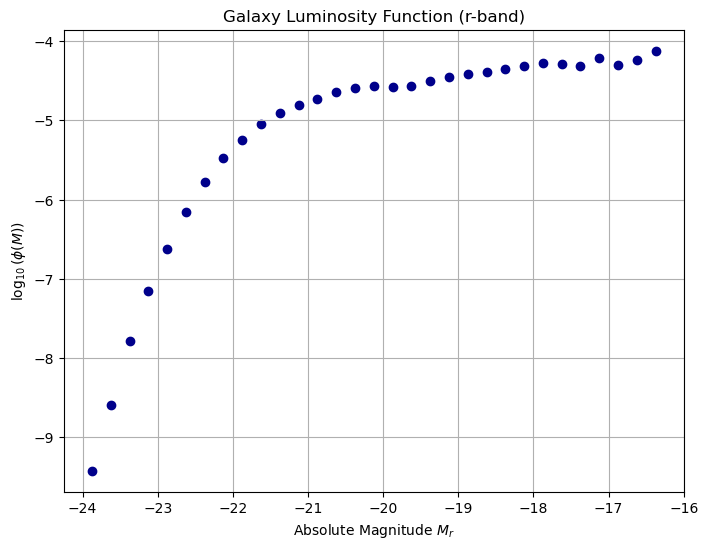

In [14]:
mbins = np.arange(-24, -16, 0.25)
hist, edges = np.histogram(df['M_r'], bins=mbins, weights=1/df['V_max'])
bincenters = 0.5 * (edges[1:] + edges[:-1])
logN = np.log10(hist)

plt.figure(figsize=(8,6))
plt.scatter(bincenters, logN, color='darkblue')
plt.xlabel("Absolute Magnitude $M_r$")
plt.ylabel(r"$\log_{10}(\phi(M))$")
plt.title("Galaxy Luminosity Function (r-band)")
plt.grid(True)
plt.show()

#### Correcting $ M^* $ from Montero-Dorta & Prada for Our Hubble Constant

Montero-Dorta & Prada provide the characteristic magnitude $ M^* $ in terms of $ M^* - 5 \log_{10} h $, where $ h = \frac{H_0}{100} $.

Given our chosen Hubble constant $ H_0 = 70 \, \mathrm{km/s/Mpc} $, we calculate:

$$
h = \frac{70}{100} = 0.7
$$

Thus, the corrected $ M^* $ is:

$$
M^* = \left( M^* - 5 \log_{10} h \right) + 5 \log_{10} h = M^*_{\text{provided}} + 5 \log_{10}(0.7)
$$

Since $ 5 \log_{10}(0.7) \approx -0.77 $, 

$$
M^* = M^*_{\text{provided}} - 0.77
$$

This correction allows us to compare $ M^* $ values consistently for our chosen $ H_0 $.


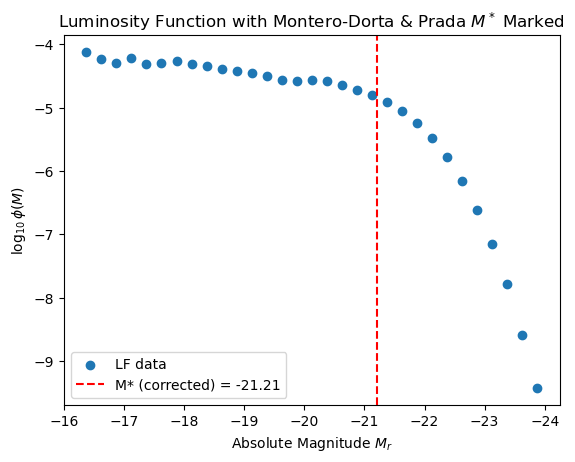

In [26]:
# Example Montero-Dorta & Prada M* value 
Mstar_provided = -20.44  # from literature
h = 0.7
Mstar_corrected = Mstar_provided + 5 * np.log10(h)

# Your existing bincenters and logN from previous LF calculation
plt.scatter(bincenters, logN, label='LF data')

# Mark M* on the plot
plt.axvline(Mstar_corrected, color='red', linestyle='--', label=f'M* (corrected) = {Mstar_corrected:.2f}')

plt.xlabel('Absolute Magnitude $M_r$')
plt.ylabel(r'$\log_{10} \phi(M)$')
plt.title('Luminosity Function with Montero-Dorta & Prada $M^*$ Marked')
plt.legend()
plt.gca().invert_xaxis()  # Magnitudes go from bright (left) to faint (right)
plt.show()


### Discussion of $ M^* $ and Luminosity Function Shape

The corrected value of $ M^* $ lies near $ \approx -21.21 $ mag, which appears consistent with the "knee" of our luminosity function — the point where the LF transitions from a power law to an exponential cutoff.

Our LF roughly follows the Schechter function shape:

- For magnitudes brighter than $ M^* $, the number density decreases exponentially.
- For fainter magnitudes, the LF follows a power-law decline characterized by the faint-end slope $ \alpha $.

Some deviations from the Schechter shape may occur at the very bright or faint ends due to sample incompleteness, survey limits, or cosmic variance.


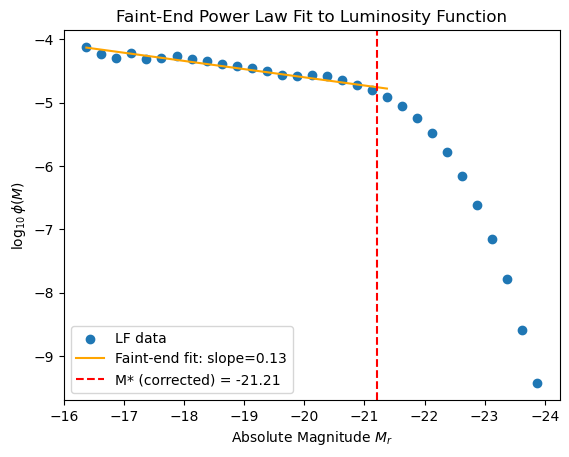

Fitted faint-end slope (α) = 0.13


In [32]:
from scipy.stats import linregress

# Select points in faint end range
faint_mask = (bincenters >= -21.5) & (bincenters <= -16)

x_fit = bincenters[faint_mask]
y_fit = logN[faint_mask]

# Linear fit: logN = slope * Mr + intercept
slope, intercept, r_value, p_value, std_err = linregress(x_fit, y_fit)

# Plot data and fit
plt.scatter(bincenters, logN, label='LF data')
plt.plot(x_fit, slope * x_fit + intercept, color='orange', label=f'Faint-end fit: slope={slope:.2f}')
plt.axvline(Mstar_corrected, color='red', linestyle='--', label=f'M* (corrected) = {Mstar_corrected:.2f}')
plt.xlabel('Absolute Magnitude $M_r$')
plt.ylabel(r'$\log_{10} \phi(M)$')
plt.title('Faint-End Power Law Fit to Luminosity Function')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

print(f"Fitted faint-end slope (α) = {slope:.2f}")


### Systematic Uncertainties in the Faint-End Slope $ \alpha $

Several factors may affect our measurement of $ \alpha $:

- **Magnitude limit bias:** The survey becomes incomplete at faint magnitudes, causing undercounting of faint galaxies and biasing $ \alpha $ toward flatter slopes.
- **Cosmic variance:** Spatial clustering can introduce fluctuations in number counts.
- **Assumptions in distance estimation:** Ignoring cosmological effects and assuming a flat Euclidean geometry can introduce distance errors.
- **Photometric errors:** Uncertainties in apparent magnitudes propagate to absolute magnitudes.
- **Volume calculation:** Using spherical volumes ignores survey footprint geometry and redshift limits.

Accounting for these uncertainties requires more sophisticated analysis beyond this exercise, but the fit gives a first-order estimate of the faint-end slope.


---